In [48]:
import numpy as np

def goertzel(x, n):
    """ Implementación del algoritmo de Goertzel para encontrar la componente espectral
        de la señal de entrada en un bin particular, con una complejidad inferior a la de
        la FFT.
        :param x: Muestras de x(n)
        :param n: Numero de bin buscado
        :return: Devuelve X(n) = DFT[x(n)]
    """
    N = len(x)
    n = n % N
    _u = np.zeros(N + 3)
    _x = np.concatenate((x, [0, 0, 0]))
    for i in range(2, N + 3):
        _u[i] = _x[i] + 2 * np.cos(2 * np.pi * n / N) * _u[i - 1] - _u[i - 2]
    return _u[N + 2] - np.exp(-2j * np.pi * n / N) * _u[N + 1]

In [49]:
fs = 8000
N = 205
n = np.arange(0, N)
low = np.sin(2 * np.pi * 697 * n / fs)
high = np.sin(2 * np.pi * 1209 * n / fs)
data = low + high
f = np.array([697, 770, 852, 941, 1209, 1336, 1477])

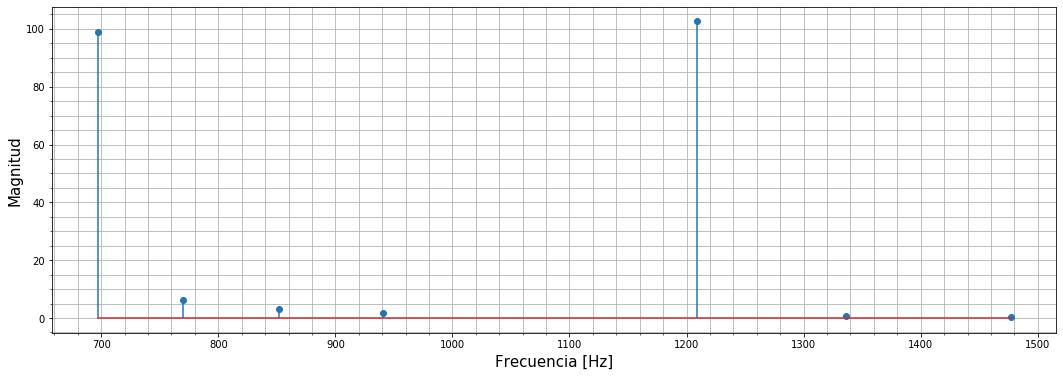

In [51]:
f_res = fs / N
f_target = np.round(f / f_res)
dfts = [goertzel(data, f_i) for f_i in f_target]

from matplotlib import pyplot

fig, ax = pyplot.subplots(1, 1,)

fig.set_figwidth(18)
fig.set_figheight(6)

ax.stem(f, np.abs(dfts), label="Bines X(n) evaluados", use_line_collection=True)
ax.set_xlabel("Frecuencia [Hz]", fontsize=15)
ax.set_ylabel("Magnitud", fontsize=15)
ax.minorticks_on()
ax.grid(which="both")

pyplot.show()